Prediction for input [3,2]: [0]


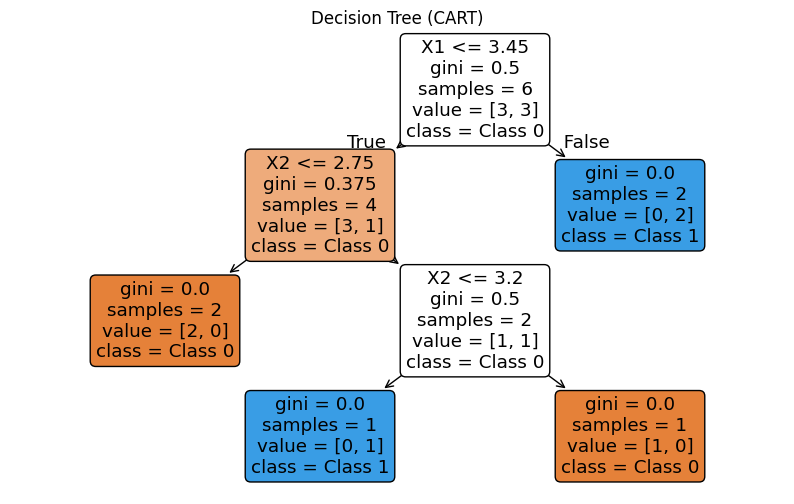

In [3]:
# ===========================================
# Decision Tree (CART) + Drawing Diagram
# ===========================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# -----------------------
# Sample dataset
# -----------------------
# Features: X1 , X2
# Target: class (0 or 1)

X = np.array([
    [2.7, 2.5],
    [1.3, 3.4],
    [3.1, 1.3],
    [3.8, 4.2],
    [2.0, 3.0],
    [7.2, 2.1]
])

y = np.array([0, 0, 0, 1, 1, 1])

# -----------------------
# Create Decision Tree model (CART)
# -----------------------
model = DecisionTreeClassifier(
    criterion='gini',   # CART uses Gini impurity
    max_depth=3,
    random_state=42
)

# Train model
model.fit(X, y)

# -----------------------
# Print prediction
# -----------------------
sample = np.array([[3, 2]])
prediction = model.predict(sample)
print("Prediction for input [3,2]:", prediction)

# -----------------------
# Draw the Decision Tree Diagram
# -----------------------
plt.figure(figsize=(10, 6))
plot_tree(
    model,
    filled=True,
    rounded=True,
    class_names=["Class 0", "Class 1"],
    feature_names=["X1", "X2"]
)
plt.title("Decision Tree (CART)")
plt.show()


In [2]:
# ===============================
# OneR Algorithm Implementation
# ===============================

import pandas as pd
from collections import defaultdict

def oner(df, target):
    attributes = df.columns.drop(target)
    best_attribute = None
    lowest_error = float('inf')
    best_rule = {}

    for attr in attributes:
        # Rule = most frequent target value per attribute value
        rules = {}
        for value in df[attr].unique():
            subset = df[df[attr] == value]
            most_common_class = subset[target].mode()[0]
            rules[value] = most_common_class

        # Calculate error
        predictions = df[attr].map(rules)
        error = sum(predictions != df[target])

        if error < lowest_error:
            lowest_error = error
            best_attribute = attr
            best_rule = rules

    return best_attribute, best_rule, lowest_error

# ---- SAMPLE DATA ----
data = {
    "weather": ["sunny", "sunny", "rainy", "rainy", "overcast"],
    "temperature": ["hot", "cool", "mild", "mild", "hot"],
    "play": ["no", "yes", "yes", "no", "yes"]
}

df = pd.DataFrame(data)

attr, rule, error = oner(df, "play")

print("Best Attribute:", attr)
print("Rule:", rule)
print("Error:", error)


Best Attribute: weather
Rule: {'sunny': 'no', 'rainy': 'no', 'overcast': 'yes'}
Error: 2
